## 8.1 이미지 로드하기

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#이미지를 로드한다.
image = cv2.imread("./images/plane.jpg",cv2.IMREAD_GRAYSCALE)

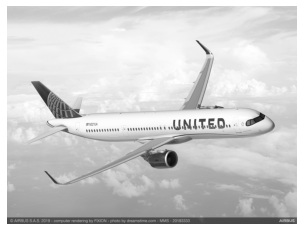

In [10]:
#이미지를 출력한다.
plt.imshow(image, cmap ='gray'),plt.axis('off')
plt.show()

In [11]:
#데이터 타입을 확인한다.
type(image)

numpy.ndarray

In [15]:
image
#각 행렬의 원소의 의미 = 픽셀 강도
#검정색(0) ~ 흰색(255)

array([[203, 203, 203, ..., 202, 203, 203],
       [203, 203, 203, ..., 201, 201, 202],
       [203, 203, 203, ..., 199, 200, 200],
       ...,
       [ 73,  73,  74, ...,  86,  88,  98],
       [ 74,  74,  73, ...,  86,  89, 100],
       [ 74,  74,  73, ...,  86,  89, 100]], dtype=uint8)

In [16]:
image.shape

(2250, 3000)

In [17]:
#컬러로 이미지를 로드한다.
image_bgr = cv2.imread("./images/plane.jpg", cv2.IMREAD_COLOR)

In [18]:
image_bgr[0,0]

array([240, 209, 176], dtype=uint8)

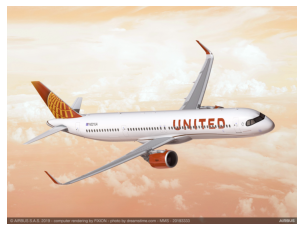

In [25]:
plt.imshow(image_bgr),plt.axis('off')
plt.show()

In [26]:
#OpenCV는 BGR을 사용하고 Matplotlib과 대부분의 어플리케이션은 RGB를 사용
#컬러를 올바르게 출력하기 위해 RGB로 바꿔줘야 한다.
#RGB로 변환
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


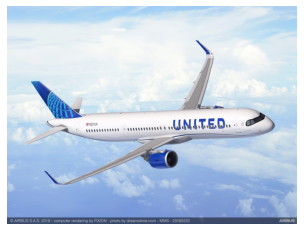

In [27]:
#이미지를 출력한다.
plt.imshow(image_rgb),plt.axis('off')
plt.show()

## 8.2 이미지 저장하기

In [28]:
#흑백 이미지로 로드한다.
image = cv2.imread("./images/plane.jpg",cv2.IMREAD_GRAYSCALE)

In [29]:
#흑백의 이미지를 저장한다.
cv2.imwrite("./images/plane_new.jpg",image)

True

## 8.3 이미지 크기 변경하기 

In [30]:
#이미지 크기를 50x50 픽셀로 바꾼다.
image_50x50 = cv2.resize(image, (50,50))

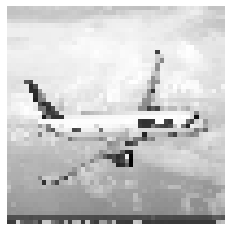

In [31]:
plt.imshow(image_50x50, cmap='gray'),plt.axis('off')
plt.show()

 - 이미지 크기 변경 이유
     - 특성으로 사용하기 위해선 동일한 차원으로 만들어 줘야한다.
     - 이미지 크기를 줄여 메모리 사용량을 크게 줄일 수 있다.
 - 이미지 표준화의 단점
      - 이미지는 행렬에 정보를 담고 있기 때문에 이미지를 줄이면 행렬의 크기와 거기에 담긴 정보도 줄어든다.

## 8.4 이미지 자르기

In [36]:
#이미지 로드
image = cv2.imread("./images/plane.jpg",cv2.IMREAD_GRAYSCALE)

In [37]:
image.shape

(2250, 3000)

In [38]:
#열의 절반과 모든 행을 선택한다.
image_cropped =image[:,:1500]

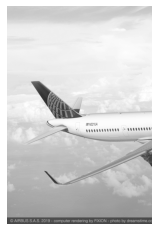

In [39]:
plt.imshow(image_cropped,cmap='gray'),plt.axis('off')
plt.show()

 - 이미지에서 특정 부분을 남기고 싶을 때 사용가능
 - 예시) 고정된 감시 카메라에서 얻은 이미지에서 특정 관심 영역만 남기고 이미지를 자를 수 있다.

## 8.5 이미지 흐리게 하기

In [40]:
#흑백 이미지 로드
image =cv2.imread('./images/plane.jpg',cv2.IMREAD_GRAYSCALE)

In [54]:
#이미지를 흐리게 한다.
#각 픽셀을 주변값의 평균값으로 변환한다.
#주변 픽셀에 수행되는 연산을 커널이라고 한다.
# 다음 예는 픽셀 주변의 50 X 50 커널 평균값으로 블러를 설정
image_blurry = cv2.blur(image,(50,50))

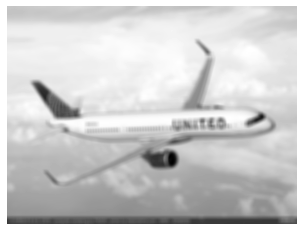

In [55]:
plt.imshow(image_blurry,cmap='gray'),plt.axis('off')
plt.show()

In [56]:
#커널 크기의 영향을 비교하기 위해 500 x 500
image_blurry = cv2.blur(image,(500,500))

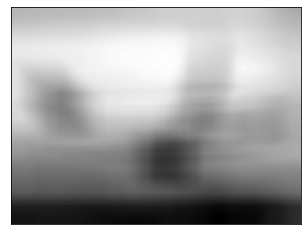

In [63]:
plt.imshow(image_blurry, cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

In [67]:
#커널 작동하는 방식
kernel = np.ones((50,50))/2500.0

In [68]:
kernel

array([[0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       ...,
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004]])

In [69]:
#커널을 적용한다.
image_kernel = cv2.filter2D(image, -1, kernel)


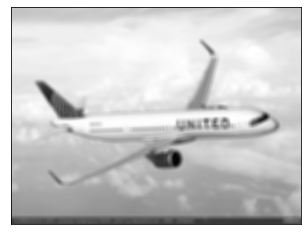

In [70]:
plt.imshow(image_kernel, cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

  - blur함수는 각 픽셀에 커널 개수의 역수를 곱하여 모두 더한다.

In [104]:
#자주 사용하는 다른 함수는 가우시안 블러이다.

#가우시안 블러를 적용한다.
image_very_blurry = cv2.GaussianBlur(image,(105,105),0)

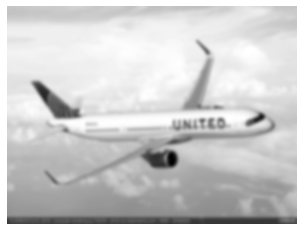

In [105]:
plt.imshow(image_very_blurry, cmap='gray'),plt.axis('off')
plt.show()

In [99]:
#gaus_blur안에서 적용되는 계산
gaus_vector =cv2.getGaussianKernel(105,0)

In [107]:
gaus_vector[:5]

array([[0.0001347 ],
       [0.0001643 ],
       [0.00019964],
       [0.00024165],
       [0.00029137]])

In [101]:
gaus_kernel = np.outer(gaus_vector,gaus_vector)
gaus_kernel

array([[1.81427761e-08, 2.21304187e-08, 2.68905737e-08, ...,
        2.68905737e-08, 2.21304187e-08, 1.81427761e-08],
       [2.21304187e-08, 2.69945146e-08, 3.28009150e-08, ...,
        3.28009150e-08, 2.69945146e-08, 2.21304187e-08],
       [2.68905737e-08, 3.28009150e-08, 3.98562465e-08, ...,
        3.98562465e-08, 3.28009150e-08, 2.68905737e-08],
       ...,
       [2.68905737e-08, 3.28009150e-08, 3.98562465e-08, ...,
        3.98562465e-08, 3.28009150e-08, 2.68905737e-08],
       [2.21304187e-08, 2.69945146e-08, 3.28009150e-08, ...,
        3.28009150e-08, 2.69945146e-08, 2.21304187e-08],
       [1.81427761e-08, 2.21304187e-08, 2.68905737e-08, ...,
        2.68905737e-08, 2.21304187e-08, 1.81427761e-08]])

In [102]:
image_kernel = cv2.filter2D(image,-1,gaus_kernel)
# 두번째 매개변수는 픽셀값의 범위를 지정하는 것으로 -1이면 입력과 동일한 범위를 유지한다.

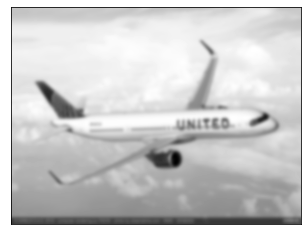

In [103]:
plt.imshow(image_kernel,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

## 8.6 이미지 선명하게 하기

In [112]:
image = cv2.imread('./images/plane.jpg',cv2.IMREAD_GRAYSCALE)

In [160]:
kernel = np.array([[0,-1,0],
                 [-1,4.8,-1],
                 [0,-1,0]])

In [161]:
#이미지를 선명하게 만든다.
image_sharp = cv2.filter2D(image, -1, kernel)


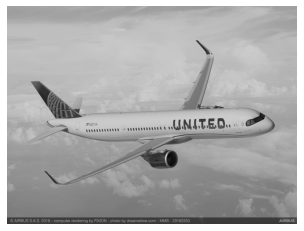

In [162]:
# 선명한 이미지를 출력
plt.imshow(image_sharp, cmap ='gray'),plt.axis('off')
plt.show()

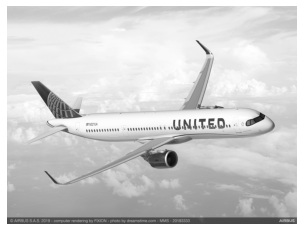

In [138]:
#원본 이미지 출력
plt.imshow(image, cmap='gray'),plt.axis('off')
plt.show()

 - 선명하게 만들어주는 방법은 흐리게 하는 것과 비슷하다
 - 주변 픽셀값의 평균을 계산하는 방법대신 중앙픽셀을 부각하는 커널을 만든다.

## 8.7 대비 높이기

In [165]:
#equalizeHist 함수를 이용한다.

#이미지 대비를 향상시킨다.
image_enhanced = cv2.equalizeHist(image)

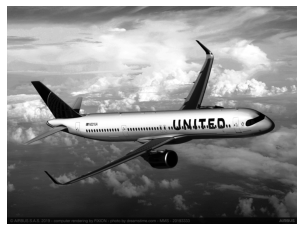

In [166]:
plt.imshow(image_enhanced, cmap='gray'),plt.axis('off')
plt.show()

In [168]:
#컬러의 이미지는 YUV컬러 포멧으로 변환해야한다.
# Y = 밝기, U,V = 컬러
# equalizeHist 이후 RGB 나 BGR로 바꾼다.

image_bgr = cv2.imread('./images/plane.jpg')

In [169]:
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

In [170]:
#히스토그램 평활화를 적용
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

In [173]:
#RGB로 바꾼다.
image_rgb= cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

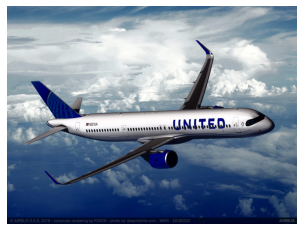

In [174]:
plt.imshow(image_rgb,cmap='gray'),plt.axis('off')
plt.show()

 - 히스토그램 평활화는 관심대상을 다른 객체나 배경과 잘 구분되도록 만들어준다
 - 항상 그렇지는 않다.

## 8.8 색깔 구분하기

In [176]:
#이미지에서 한 색깔을 구분할 때 사용

image_bgr = cv2.imread('./images/plane.jpg')

In [177]:
#bgr에서 HSV로 변환
image_hsv = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2HSV)

In [211]:
#HSV에서 파란 값의 범위를 정의한다.
lower_blue = np.array([40,15,40])
upper_blue = np.array([130,255,255])

In [212]:
#마스크를 만든다.
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

In [213]:
#이미지에 마스크를 적용한다.
image_bgr_masked= cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

In [214]:
#BGR에서 RGB로 변환한다.
image_rgb= cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

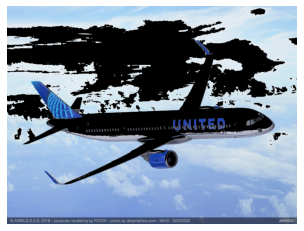

In [215]:
plt.imshow(image_rgb,cmap='gray'),plt.axis('off')
plt.show()

 - 직관적으로 색깔 구분을 한다.
 - 첫째 : HSV로 변환한다(색상, 채도, 명도)
 - 둘째 : 구분할 값의 범위를 정한다. (가장 어렵고 시간이 오래걸리는 작업)
 - 셋째 : 이미지에 적용할 마스크를 만든다.

## 8.9 이미지 이진화 하기

In [217]:
image_gray = cv2.imread('./images/plane.jpg',cv2.IMREAD_GRAYSCALE)

In [222]:
#적응적 이진화를 적용한다.
max_out_value = 255
neighborhood_size =99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_gray,
                                       max_out_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)


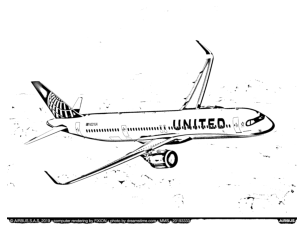

In [223]:
#이미지를 출력한다.
plt.imshow(image_binarized ,cmap='gray'),plt.axis('off')
plt.show()

 - max_out_value = 출력 픽셀 강도의 최댓값
 - cv2.ADAPTIVE_THRESH_GAUSSIAN_C = 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정
 - cv2.ADAPTIVE_THRESH_MEAN_C = 주변 픽셀의 평균을 임계값으로 설정

In [224]:
#cv2.ADAPTIVE_THRESH_MEAN_C를 적용한다.
image_mean_threshold = cv2.adaptiveThreshold(image_gray,
                                            max_out_value,
                                            cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY,
                                            neighborhood_size,
                                            subtract_from_mean)

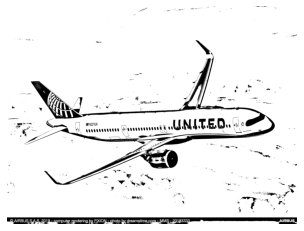

In [225]:
plt.imshow(image_mean_threshold,cmap='gray'),plt.axis('off')
plt.show()

 - 이진화의 주요장점 : 중요한 요소를 유지하면서 이미지의 노이즈를 제거하는 것

## 8.10 배경 제거하기

 - 오류 해결을 위해 사이즈 조절


In [43]:
image = cv2.imread('./images/plane.jpg',cv2.IMREAD_COLOR)

In [45]:
#이미지 크기 조절
image_small = cv2.resize(image,(256,256))

In [46]:
#이미지 저장
cv2.imwrite("./images/plane_small.jpg",image_small)

True

In [47]:
#이미지를 로드하고 rgb로 변환해준다.
image_bgr = cv2.imread('./images/plane_small.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [48]:
image_rgb.shape

(256, 256, 3)

In [50]:
rectangle = (0,56,256,150)##2500으로 바꿀가,,

In [51]:
#초기 마스크를 만든다.
mask = np.zeros(image_rgb.shape[:2],np.uint8)

In [52]:
#grabCut에서 사용할 임시 배열을 만든다.
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [53]:
# grabCut을 실행시킨다
# 원본 plane.jpg사용시 너무 시간이 오래걸림.
# 사진의 크기를 조정하고 다시 실행
cv2.grabCut(image_rgb,
           mask,
           rectangle,
           bgdModel,
           fgdModel,
           5,
           cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 4.05855589e-01,  1.36676558e-01,  3.78437191e-02,
          1.27695351e-01,  2.91928783e-01,  2.32795428e+02,
          2.40420501e+02,  2.43938438e+02,  1.52481835e+02,
          1.81154726e+02,  2.23950065e+02,  6.31359122e+01,
          7.80616832e+01,  1.08696811e+02,  1.29316809e+02,
          1.60540821e+02,  2.17838730e+02,  1.92739852e+02,
          2.17297350e+02,  2.36143322e+02,  9.25738161e+01,
          5.23075084e+01,  1.71736511e+01,  5.23075084e+01,
          3.22581077e+01,  1.12679905e+01,  1.71736511e+01,
          1.12679905e+01,  8.26570713e+00,  1.22603701e+02,
          9.04509941e+01,  7.92100639e+00,  9.04509941e+01,
          8.25192645e+01,  2.91484123e+01,  7.92100639e+00,
          2.91484123e+01,  6.14033540e+01,  2.61736886

In [55]:
#배경인 곳은 0, 그외에는 1로 설정한 mask로 만든다.
mask_2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

In [56]:
#이미지에 새로운 마스크를 곱해 배경을 제외한다.
image_rgb_nobg = image_rgb*mask_2[:,:,np.newaxis]

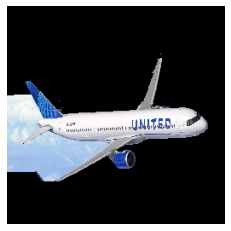

In [57]:
#이미지 출력
plt.imshow(image_rgb_nobg),plt.axis('off')
plt.show()

 - 그랩컷을 작동해도 이미지에 배경이 남아있을 수 있다.
 - 직접 남아있는 영역을 배경으로 지정할 수 있다.
 - 그러나 수천장의 이미지를 각각 수동으로 고치는 것은 불가능하다.
 - 따라서 이미지에 일부 배경이 남아있는 것을 수용하는것이 좋다

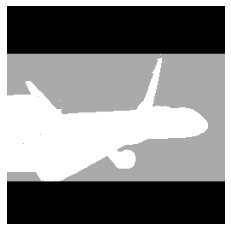

In [60]:
#mask 출력
plt.imshow(mask,cmap='gray'),plt.axis('off')
plt.show()

 - 검은영역: 화실한 배경
 - 회색 영역 : 그랩컷이 배경이라고 생각한 영역
 - 흰색 영역 : 전경

## 8.11 경계선 감지하기

In [62]:
#흑백이미지를 로드한다.
image = cv2.imread("./images/plane_small.jpg",cv2.IMREAD_GRAYSCALE)

In [64]:
#픽셀 강도의 중간값을 계산한다.
median_intensity = np.median(image)

In [65]:
#중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정한다.
lower_threshold = int(max(0,1.0-0.33)*median_intensity)
upper_threshold = int(min(225,(1.0+0.33)*median_intensity))

In [66]:
#캐니 경계선 감지기 사용
image_canny = cv2.Canny(image,lower_threshold,upper_threshold)

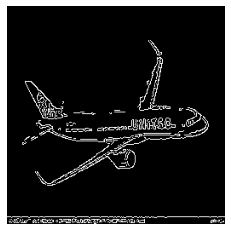

In [67]:
plt.imshow(image_canny, cmap='gray'),plt.axis('off')
plt.show()

 - 경계선에는 많은 정보가 담겨있다.
 - Canny함수는 낮은 임계값과 높은 임계값이 필수 매개변수이다.

## 8.12 모서리 감지하기

In [97]:
#cornerHarris를 사용한다.
#image = cv2.imread("./images/plane_small.jpg",cv2.IMREAD_GRAYSCALE
#위의방법처럼 흑백이미지를 로드하면 안돼.
#bgr을 흑백으로 만들어줘야됌. (이유는 모르겠다...)
image =cv2.imread("./images/plane_small.jpg")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_gray=np.float32(image_gray)

In [98]:
#모서리 감지 매개변수를 설정한다.
block_size =4
aperture = 29
free_parameter = 0.07

In [99]:
#모서리를 감지한다.
detector_responses = cv2.cornerHarris(image_gray,
                                     block_size,
                                     aperture,
                                     free_parameter)

 - block_size : 모서리 감지에 사용되는 이웃 픽셀의 크기
 - aperture : 사용하는 소벨 커널
 - free_parameter : 부드러운 모서리를 구별하는 매개변수

In [100]:
#모서리 표시를 부각시킨다.
detector_responses = cv2.dilate(detector_responses,None)

In [101]:
#임계값보다 큰 감지 결과만 남기고, 흰색으로 표시한다.
threshold = 0.02

image[detector_responses >
     threshold * 
     detector_responses.max()] = [255,255,255]

In [102]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

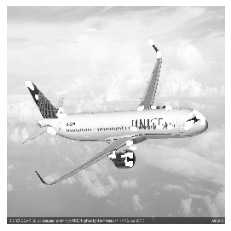

In [103]:
#이미지를 출력한다.
plt.imshow(image_gray, cmap='gray'),plt.axis('off')
plt.show()

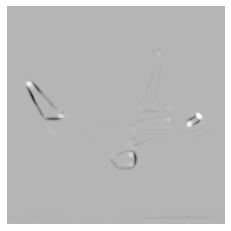

In [104]:
#가능성이 높은 모서리를 출력한다.
plt.imshow(detector_responses, cmap='gray'),plt.axis('off')
plt.show()

In [105]:
#goodFeatureToTrack사용

#이미지로드
image_bgr = cv2.imread('./images/plane_small.jpg')
image_gray =cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

In [115]:
#감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.08
minimum_distance = 20

In [117]:
#모서리를 감지한다.
corners = cv2.goodFeaturesToTrack(image_gray,
                                 corners_to_detect,
                                 minimum_quality_score,
                                 minimum_distance)

 - goodFeatureToTrack의 중요한 3가지 매개변수
    - 감지할 모서리 개수
    - 모서리가 될 최소 품질
    - 모서리 사이의 최소 유클리드 거리

In [118]:
corners = np.float32(corners)

In [119]:
#모서리마다 흰 원을 그린다.
for corner in corners :
    x,y = corner[0]
    cv2.circle(image_bgr, (x,y),10,(255,255,255),-1)


<ipython-input-119-cae307949b64>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_bgr, (x,y),10,(255,255,255),-1)


In [120]:
#흑백 이미지로 변환
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

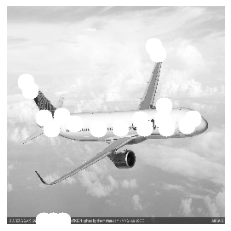

In [121]:
plt.imshow(image_gray, cmap='gray'),plt.axis('off')
plt.show()

## 8.13 머신러닝 특성 만들기

In [123]:
image =cv2.imread("./images/plane_small.jpg",cv2.IMREAD_GRAYSCALE)

In [124]:
image_10x10 = cv2.resize(image,(10,10))

In [125]:
image_10x10.flatten()

array([203, 204, 206, 204, 222, 223, 223, 231, 229, 210, 224, 238, 235,
       249, 244, 240, 236, 230, 224, 222, 238, 238, 240, 242, 247, 248,
       234, 234, 248, 228, 225, 233, 235, 243, 239, 246, 172, 247, 246,
       223, 243, 110, 202, 236, 222, 225, 147, 224, 227, 213, 207, 180,
       251, 250, 245, 242,  97, 150, 236, 203, 197, 198, 196, 193, 191,
       199, 207, 212, 211, 205, 183, 184, 182, 159, 194, 183, 175, 192,
       205, 198, 172, 174, 168, 166, 187, 166, 161, 163, 167, 160, 156,
       159, 153, 151, 150, 152, 152, 154, 153, 181], dtype=uint8)

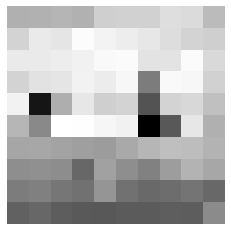

In [126]:
plt.imshow(image_10x10, cmap='gray'),plt.axis('off')
plt.show()

 - 이때 데이터의 차원은 10x10

In [128]:
print(image_10x10.shape)
image_10x10.flatten().shape # 배열을 일렬로 펼쳤기 떄문에 100

(10, 10)


(100,)

In [129]:
#컬러라면 RGB를 나타내는 값이 합쳐져서 픽셀의 최종값을 만든다.
#따라서 10x10 컬러이미지라면 300개의 특성갑싱 만들어진다.

#컬러 이미지를 로드한다.
image_color = cv2.imread("./images/plane_small.jpg",cv2.IMREAD_COLOR)


In [130]:
#이미지의 크기를 10x10으로 변환한다.
image_color_10x10 = cv2.resize(image_color,(10,10))

In [132]:
#이미지 데이터를 1차원을 변경후 차원을 출력
image_color_10x10.flatten().shape

(300,)

In [133]:
#만약 픽셀의 크기가 256x256일 경우
image_gray_256x256 = cv2.imread('./images/plane_small.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
image_gra